# LL Surfaces

---

Aditya Marathe

**Aims**:

- Understand how PyOscCalc works...
    - *My understanding*: It simulates matter effects on oscillation prob.
- Calculate LL for our data...

Useful equations for an oscillation fit:

$$
    \text{ln}\mathscr{L} = - \sum_{i=1}^N \left( \text{P}_i(\text{Osc. Params.}) - \text{O}_i + \text{O}_i \times \text{ln} \frac{\text{O}_i}{\text{P}_i(\text{Osc. Params.})} \right)
$$

$$
    \chi^2 = - 2 \text{ln} \mathscr{L}
$$

where $\text{P}_i(\text{Osc. Params.})$ is the predicted energy distribution calculated by passing the possible oscillation parameters to an oscillation calculator (PyOscCalc) and $\text{O}_i$ is the observed energy distribution from the experiment.

What are the oscillation parameters are we fitting for?

- $\text{sin}^2 \theta_{23}$
- $\Delta m_{31}^2$
- $\delta_\text{CP}$

Stuff we cannot fit, so we just constrain them...

- $\text{sin}^2 \theta_{12} = 0.307$
- $\text{sin}^2 \theta_{13} = 0.0210 \pm 0.0011$
- $\Delta m_{21}^2 = 7.53 \times 10^{-5} \;\; \text{eV}^2$


## Imports

In [1]:
%matplotlib inline

import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

In [2]:
import sys

sys.path.insert(1, './../../pyosccalc/')
sys.path.insert(1, './../')

import ana
import plotting
from utils import *
from cuts import *

In [3]:
from OscCalc import OscCalc
from FluxTools import FluxTools, LogNormalFlux
from FitTools import FitTools

## LL (Example)

In [4]:
osccalc = OscCalc(density=1E-6)

In [5]:
# Calculating the oscillation probabilities...
# A small delta was added to the bin values to prevent a ZeroDivisionError

bins = np.linspace(0.1, 10, 10_000)

mu_survival = np.asarray(
    [osccalc.MuToMu(energy) for energy in bins]
)
e_appearance = np.asarray(
    [osccalc.MuToElec(energy) for energy in bins]
)
tau_appearance = np.asarray(
    [osccalc.MuToTau(energy) for energy in bins]
)

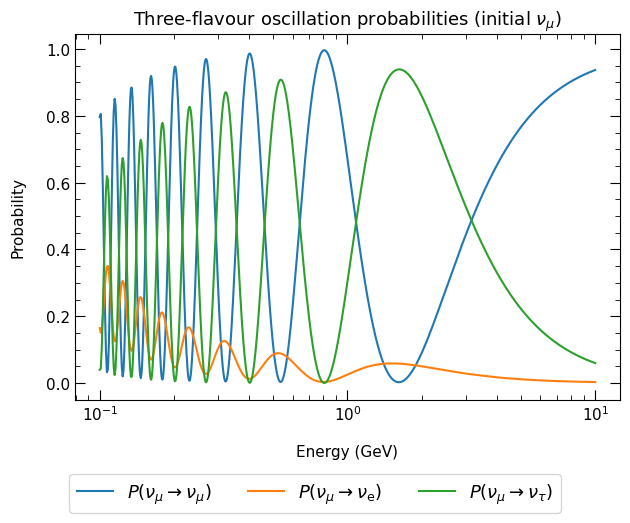

In [6]:
sp = plotting.Subplots(fontsize=11)

ax = sp.axs[0]

ax.plot(bins, mu_survival, lw=1.5, label=r'$P(\nu_\mu\rightarrow\nu_\mu)$')
ax.plot(bins, e_appearance, lw=1.5, label=r'$P(\nu_\mu\rightarrow\nu_\text{e})$')
ax.plot(bins, tau_appearance, lw=1.5, label=r'$P(\nu_\mu\rightarrow\nu_\tau)$')

sp.fig_legend(0)

ax.set_xscale('log')

sp.set_ax_labels(
    0,
    title=r'Three-flavour oscillation probabilities (initial $\nu_\mu$)',
    x_label='Energy (GeV)',
    y_label='Probability'
)

sp.fig.tight_layout()

# sp.save_plot('ThreeNu Osc Prob', './../../figures', force=False);

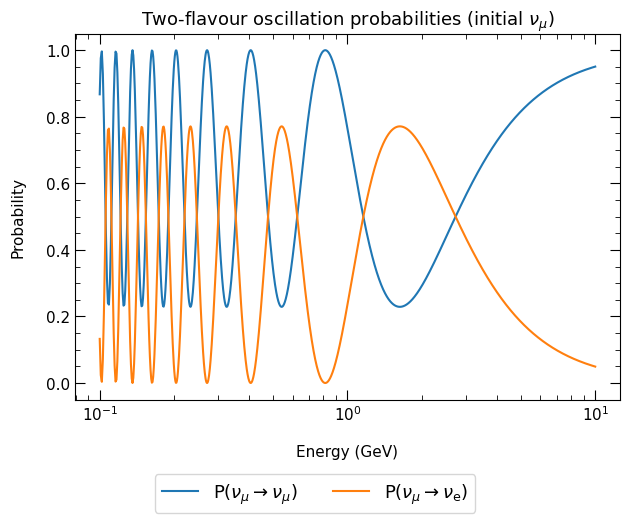

In [7]:
sp = plotting.Subplots(fontsize=11)

ax = sp.axs[0]

def osc_prob(L, E, dm2=(2 * 0.002444 + 7.53e-05) / 2, theta=0.536):
    return np.sin(2 * theta)**2 * np.sin(1.27 * dm2 * L / E)**2

ax.plot(bins, 1 - osc_prob(811, bins), label=r'P($\nu_\mu\rightarrow\nu_\mu$)')
ax.plot(bins, osc_prob(811, bins), label=r'P($\nu_\mu\rightarrow\nu_\text{e}$)')

sp.fig_legend(0)

ax.set_xscale('log')

sp.set_ax_labels(
    0,
    title=r'Two-flavour oscillation probabilities (initial $\nu_\mu$)',
    x_label='Energy (GeV)',
    y_label='Probability'
)

sp.fig.tight_layout()

# sp.save_plot('TwoNu Osc Prob', './../../figures', force=False);

In [8]:
fluxtools = FluxTools()
lognormflux = LogNormalFlux(shape=0.2, scale=2.2)

pdf = fluxtools.pdfwrap(lognormflux)

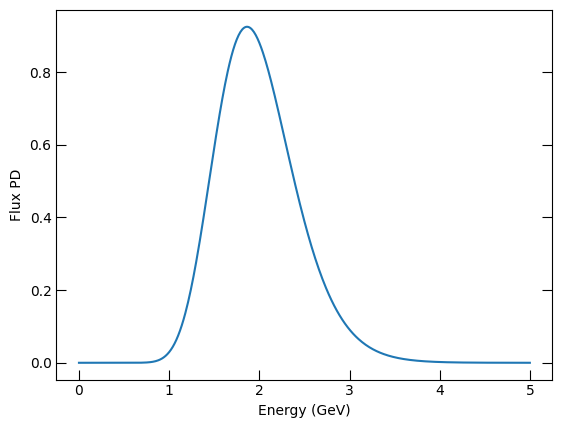

In [9]:
fig, ax = custom_subplots()

bins = np.linspace(0, 5, pdf.shape[0])

ax.plot(bins, pdf)

ax.set_xlabel('Energy (GeV)')
ax.set_ylabel('Flux PD');

In [10]:
# Create an experiment
bin_weights = fluxtools.getNuMuAsimov(flux=lognormflux, osccalc=osccalc)
bin_edges = fluxtools.binEdges

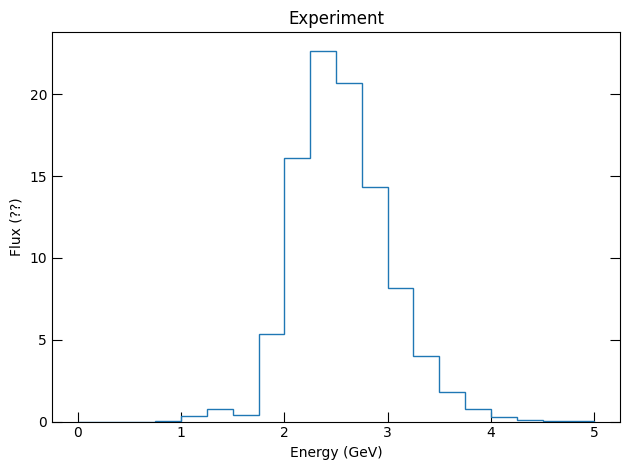

In [11]:
fig, ax = custom_subplots()

ax.hist(bin_edges[:-1], bin_edges, weights=bin_weights, histtype='step')

ax.set_title('Experiment')
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel('Flux (??)')

plt.tight_layout();

In [12]:
# Experiments in a bunch of fake universes...
exp_universes = [
    fluxtools.genNuMuExperiment(lognormflux, osccalc) for _ in range(10_000)
]

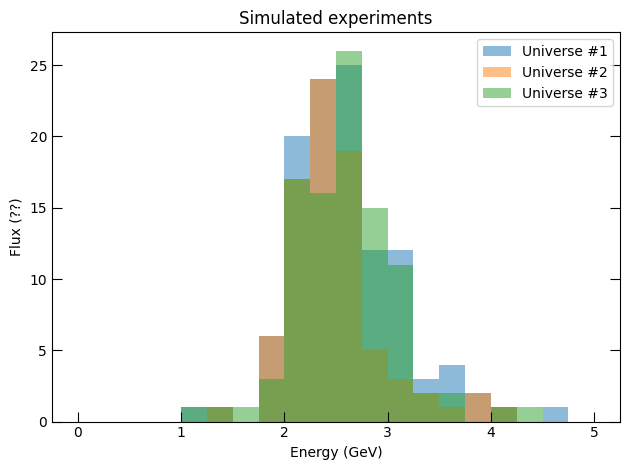

In [13]:
fig, ax = custom_subplots()

for i, exp_universe in enumerate(exp_universes[:3]):
    ax.hist(
        bin_edges[:-1], 
        bin_edges, 
        weights=exp_universe, 
        alpha=0.5,
        label=f'Universe #{i + 1}'
    )

ax.legend()

ax.set_title('Simulated experiments')
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel('Flux (??)')

plt.tight_layout();

In [14]:
# Possible osc. parameters in the neutrino oscillation multi-verse (TM)...

d_m32_array = np.linspace(2.2E-3, 2.6E-3, 20)
sin_sq_23_array = np.linspace(0.35, 0.65, 20)
d_cp_array = np.linspace(0, 2 * np.pi, 20)

# d_m32_array = np.linspace(2.0E-3, 2.8E-3, 20)
# sin_sq_23_array = np.linspace(0.25, 0.75, 20)
# d_cp_array = np.linspace(0, 2 * np.pi, 20)

In [15]:
# asimov_array = fluxtools.makeNuMuAsimovArray(
#     lognormflux, 
#     osccalc,
#     d_m32_array,
#     sin_sq_23_array,
#     d_cp_array
# )

In [16]:
# mu_ll_array_test = [
#     [
#         [
#             FitTools.getPoissonLL(asimov, bin_weights) for asimov in asimov_row
#         ] for asimov_row in asimov_mat
#     ] for asimov_mat in asimov_array
# ]

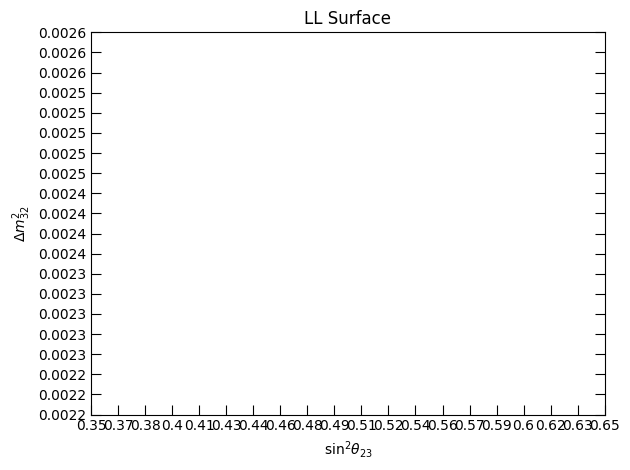

In [17]:
fig, ax = custom_subplots()

# image = ax.imshow(FitTools.profile3Dto2D(mu_ll_array_test, [2, 1]), cmap='cool')
# colourbar = fig.colorbar(image)

ax.set_xticks(range(sin_sq_23_array.shape[0]))
ax.set_yticks(range(d_m32_array.shape[0]))

ax.set_xticklabels(np.round(sin_sq_23_array, 2))
ax.set_yticklabels(np.round(d_m32_array, 4))

ax.set_title('LL Surface')
ax.set_xlabel(r'$\text{sin}^2 \theta_{23}$')
ax.set_ylabel(r'$\Delta m_{32}^2$')

plt.tight_layout();

## LL Current cuts

In [18]:
ds = Datasets()

Datasets | Found the following: MINI_DATA_DIR, DATA_V2_DIR, DATA_V3_DIR, REALLY_MINI_DIR, COPYMERGED_C8_DIR, COPYMERGED_C9_DIR, COPYMERGED_C10_DIR, COPYMERGED_C11_DIR, COPYMERGED_C13_DIR, COPYMERGED_C15_DIR, COPYMERGED_C16_DIR, COPYMERGED_C17_DIR, COPYMERGED_C19_DIR, COPYMERGED_C20_DIR, COPYMERGED_C21_DIR, COPYMERGED_C22_DIR


In [175]:
data = ana.NOvAData.init_from_copymerge_h5(
    h5dirs=[
        ds.COPYMERGED_C8_DIR,  # type: ignore
        # ds.COPYMERGED_C9_DIR,  # type: ignore
        # ds.COPYMERGED_C10_DIR  # type: ignore
    ]
)

NOvAData | Loading tables from copymerged HDF5 files...
NOvAData | Loaded table from copymerged HDF5 files (1 / 1).
NOvAData | Initialised NOvAData(features=57, events=154_021).


In [176]:
len(data.table)

154021

In [189]:
data.table = data.table.head(3_000)

In [190]:
data.fill_ana_flags(inplace=True)

NOvAData | Filled MC truth flags.


In [191]:
cuts = ana.Cuts.init_nova_cuts()

In [192]:
full_cut_table = cuts.apply_all_cuts(data.table)

Cuts     | Applied 'Detector Quality' cut (3_000 -> 2_526 events).
Cuts     | Applied 'Data Quality' cut (2_526 -> 2_526 events).
Cuts     | Applied 'CVN PID Score' cut (2_526 -> 532 events).
Cuts     | Applied 'Containment' cut (532 -> 259 events).
Cuts     | Applied 'Cosmic Rej.' cut (259 -> 252 events).
Cuts     | Applied 'Veto' cut (252 -> 252 events).


In [193]:
full_cut_table = full_cut_table[full_cut_table['rec.mc.nu.E'] <= 5.]

In [194]:
len(full_cut_table)

235

In [259]:
is_sig = full_cut_table['ana.mc.flag.isNuMuCC']

eBinsCalc = np.linspace(1e-3, 100, 1000)
which_bin=np.digitize(full_cut_table['rec.mc.nu.E'], eBinsCalc)

#Step two get oscillation calculator
# Source: PDG
calcy = OscCalc(
    sinSqTheta12=0.307,
    sinSqTheta13=0.0210,
    sinSqTheta23=0.57,
    deltamSq21=7.53e-05,
    deltamSq32=2.41E-3,
    dcp=0.82 * np.pi
)


#Step three get your default (Asimov) oscillation probability
def getNuMuNuMuOscProb(calcy):

    muSurv = np.asarray([calcy.MuToMu(E) for E in eBinsCalc])
    newOscProb=muSurv[which_bin]
    newOscProb=(1 - is_sig) + (is_sig * newOscProb)
    return newOscProb

oscProb = getNuMuNuMuOscProb(calcy)

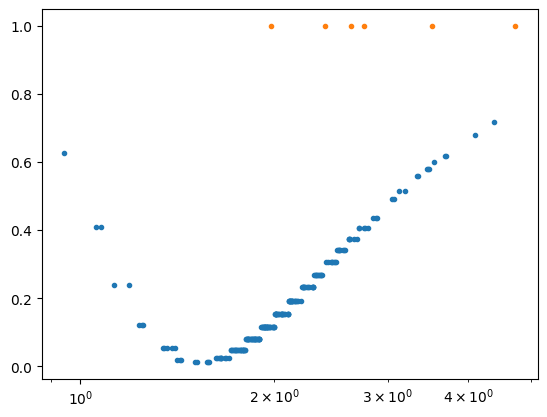

In [260]:
plt.plot(full_cut_table['rec.mc.nu.E'][is_sig > 0][oscProb[is_sig > 0].index], oscProb[is_sig > 0], '.')
plt.plot(full_cut_table['rec.mc.nu.E'][is_sig < 1][oscProb[is_sig < 1].index], oscProb[is_sig < 1], '.')
plt.xscale('log');

In [261]:
def get_osc_prob(table, bins, osccalc):
    is_sig = table['ana.mc.flag.isNuMuCC']
    which_bin = np.digitize(table['rec.mc.nu.E'], bins)

    muSurv = np.asarray([osccalc.MuToMu(E) for E in bins])
    newOscProb=muSurv[which_bin]
    newOscProb=(1 - is_sig) + (is_sig * newOscProb)

    return newOscProb

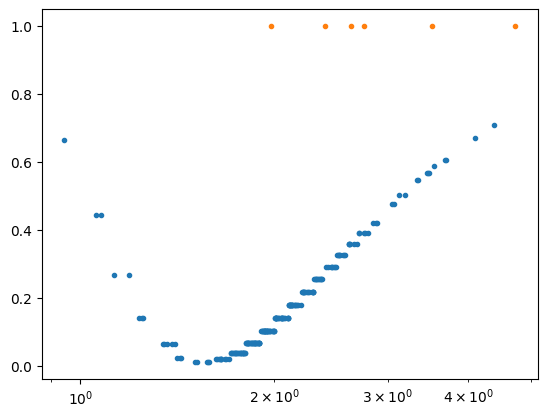

In [241]:
_osc_prob = get_osc_prob(full_cut_table, np.linspace(1E-3, 10, 100), OscCalc())
_is_sig = full_cut_table['ana.mc.flag.isNuMuCC']
plt.plot(full_cut_table['rec.mc.nu.E'][_is_sig > 0][_osc_prob[_is_sig > 0].index], oscProb[_is_sig > 0], '.')
plt.plot(full_cut_table['rec.mc.nu.E'][_is_sig < 1][_osc_prob[_is_sig < 1].index], oscProb[_is_sig < 1], '.')
plt.xscale('log');

In [262]:
which_bin = np.digitize(full_cut_table['rec.mc.nu.E'], np.linspace(0, 5, 50 + 1))

In [263]:
is_sig_nidx = is_sig.reset_index(drop=True)
oscProb_nidx = oscProb.reset_index(drop=True)

In [264]:
oscProb_nidx[(which_bin == 0) & (is_sig_nidx > 0)].mean()

nan

In [265]:
oscProb_binned = []

for b in range(0, 50, 1):
    op = oscProb_nidx[(which_bin == b) & (is_sig_nidx > 0)].mean()

    if op > 0.:
        oscProb_binned.append(op)
    else:
        oscProb_binned.append(1)


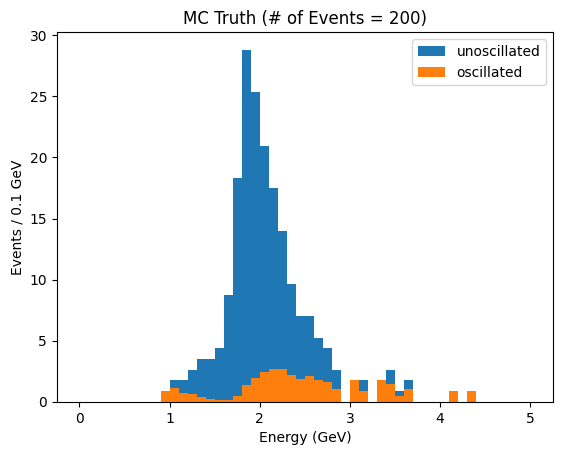

In [266]:
v_mc, _ = np.histogram(
    full_cut_table['rec.mc.nu.E'][is_sig > 0],
    bins=np.linspace(0, 5, 50 + 1)
)

v_mc = v_mc / np.sum(v_mc[v_mc > 0])

plt.hist(
    np.linspace(0, 5, 50 + 1)[:-1],
    bins=np.linspace(0, 5, 50 + 1),
    weights=v_mc * 200,  # custom exposure...
    label='unoscillated'
)

plt.hist(
    np.linspace(0, 5, 50 + 1)[:-1],
    bins=np.linspace(0, 5, 50 + 1),
    weights=v_mc * 200 * oscProb_binned,
    label='oscillated'
)

plt.xlabel('Energy (GeV)')
plt.ylabel('Events / 0.1 GeV')
plt.title('MC Truth (# of Events = 200)')
plt.legend();

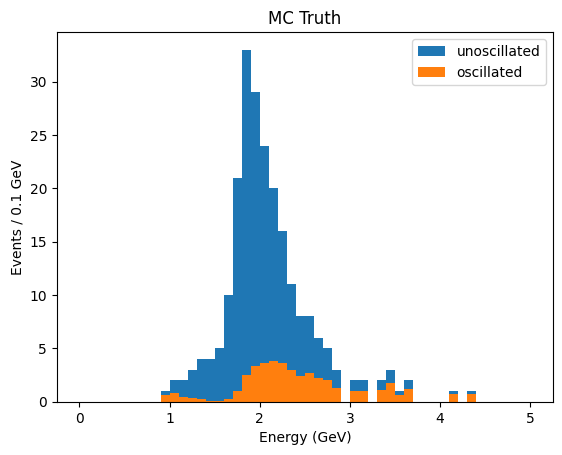

In [267]:
plt.hist(
    full_cut_table['rec.mc.nu.E'][is_sig > 0],
    bins=np.linspace(0, 5, 50 + 1),
    label='unoscillated'
)
plt.hist(
    full_cut_table['rec.mc.nu.E'][is_sig > 0],
    weights=oscProb[is_sig > 0], 
    bins=np.linspace(0, 5, 50 + 1),
    label='oscillated'
)
plt.xlabel('Energy (GeV)')
plt.ylabel('Events / 0.1 GeV')
plt.title('MC Truth')
plt.legend();

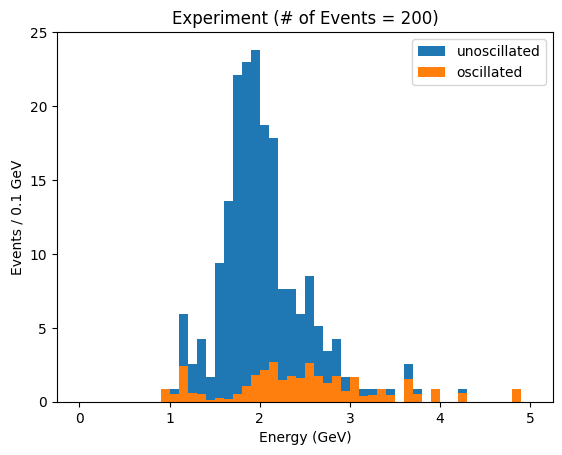

In [268]:
v_ep, _ = np.histogram(
    full_cut_table['rec.energy.numu.lstmnu'],
    bins=np.linspace(0, 5, 50 + 1)
)

v_ep = v_ep / np.sum(v_ep[v_ep > 0])

plt.hist(
    np.linspace(0, 5, 50 + 1)[:-1],
    bins=np.linspace(0, 5, 50 + 1),
    weights=v_ep * 200,  # custom exposure...
    label='unoscillated'
)

plt.hist(
    np.linspace(0, 5, 50 + 1)[:-1],
    bins=np.linspace(0, 5, 50 + 1),
    weights=v_ep * 200 * oscProb_binned,
    label='oscillated'
)

plt.xlabel('Energy (GeV)')
plt.ylabel('Events / 0.1 GeV')
plt.title('Experiment (# of Events = 200)')
plt.legend();

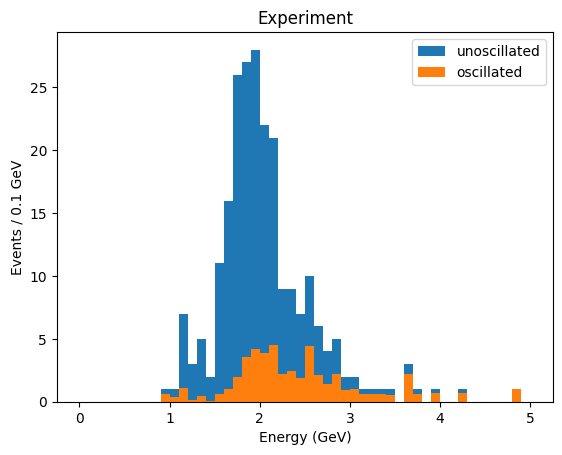

In [269]:
plt.hist(
    full_cut_table['rec.energy.numu.lstmnu'], #[is_sig > 0],
    bins=np.linspace(0, 5, 50 + 1),
    label='unoscillated'
)
plt.hist(
    full_cut_table['rec.energy.numu.lstmnu'], # [is_sig > 0],
    weights=oscProb, # [is_sig > 0], 
    bins=np.linspace(0, 5, 50 + 1),
    label='oscillated'
)
plt.xlabel('Energy (GeV)')
plt.ylabel('Events / 0.1 GeV')
plt.title('Experiment')
plt.legend();

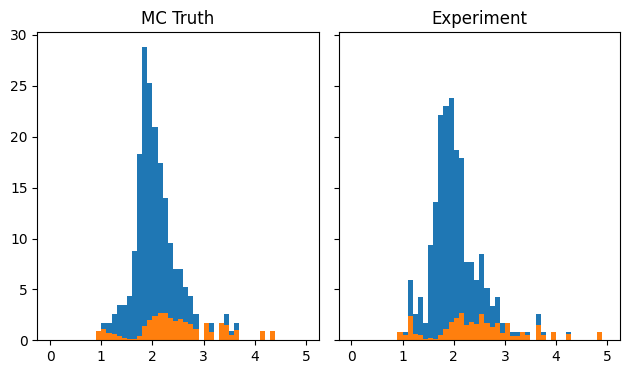

In [270]:
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True)

axs[0].hist(
    np.linspace(0, 5, 50 + 1)[:-1],
    bins=np.linspace(0, 5, 50 + 1),
    weights=v_mc * 200,  # custom exposure...
    label='unoscillated'
)
axs[0].hist(
    np.linspace(0, 5, 50 + 1)[:-1],
    bins=np.linspace(0, 5, 50 + 1),
    weights=v_mc * 200 * oscProb_binned,
    label='oscillated'
)
axs[0].set_title('MC Truth')

axs[1].hist(
    np.linspace(0, 5, 50 + 1)[:-1],
    bins=np.linspace(0, 5, 50 + 1),
    weights=v_ep * 200,  # custom exposure...
    label='unoscillated'
)
axs[1].hist(
    np.linspace(0, 5, 50 + 1)[:-1],
    bins=np.linspace(0, 5, 50 + 1),
    weights=v_ep * 200 * oscProb_binned,
    label='oscillated'
)
axs[1].set_title('Experiment')

fig.tight_layout(rect=(0, 0, 1, 0.8))

In [271]:
def get_array(
        table,
        bins,
        dm32_values,
        sinsq23_values,
        dcp_values
    ):
    a = []
    for dcp in dcp_values:
        mat = []
        for sSq23 in sinsq23_values:
            row = []
            for dm32 in dm32_values:
                osccalc = OscCalc(
                    sinSqTheta12=0.307,
                    sinSqTheta13=0.0211,
                    sinSqTheta23=sSq23,
                    deltamSq21=7.53e-05,
                    deltamSq32=dm32,
                    dcp=dcp,
                    density=2.7,
                    L=811,
                    isAntiNu=1
                )
                osc_weight = get_osc_prob(table, bins, osccalc)
                val, _ = np.histogram(
                    table['rec.mc.nu.E'][osc_weight.index],
                    weights=osc_weight,
                    bins=np.linspace(0, 5, 50 + 1)
                )
                row.append(val)
            mat.append(row)
        a.append(mat)
    return a



In [272]:
dm32_values = np.linspace(2.2E-3, 2.7E-3, 20)
sinsq23_values = np.linspace(0.32, 0.7, 20)
dcp_values = np.linspace(0, 2 * np.pi, 20)

In [216]:
asimov_array = get_array(
    full_cut_table,
    bins=np.linspace(1E-3, 10, 1_000),
    dm32_values=dm32_values,
    sinsq23_values=sinsq23_values,
    dcp_values=dcp_values
)

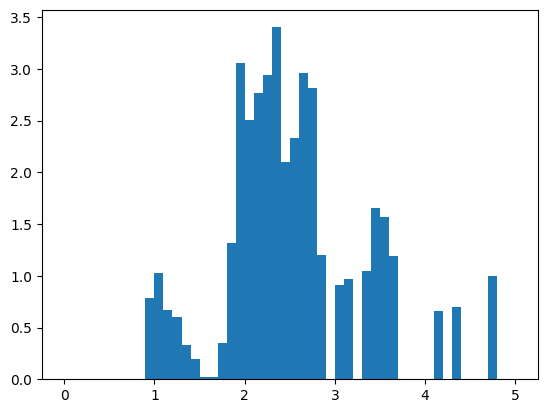

In [273]:
plt.hist(
    np.linspace(0, 5, 50 + 1)[:-1],
    bins=np.linspace(0, 5, 50 + 1),
    weights=asimov_array[10][10][10]
);

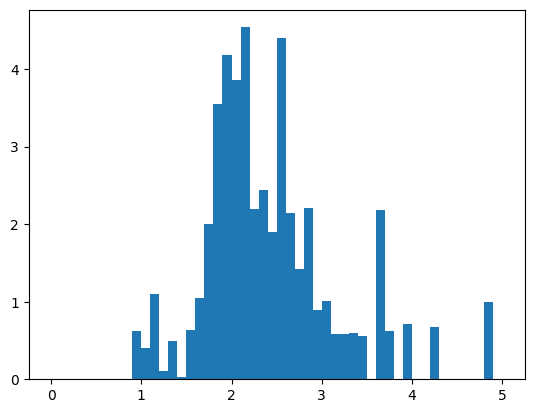

In [274]:
exp_vals, exp_edges = np.histogram(
    full_cut_table['rec.energy.numu.lstmnu'], # [is_sig > 0],
    weights=oscProb, # [is_sig > 0], 
    bins=np.linspace(0, 5, 50 + 1)
)
plt.hist(
    exp_edges[:-1],
    bins=exp_edges,
    weights=exp_vals
);

In [275]:
ll_surf = [
    [
        [
            FitTools.getPoissonLL(asimov, exp_vals) for asimov in asimov_row
        ] for asimov_row in asimov_mat
    ] for asimov_mat in asimov_array
]

In [220]:
# New exp.

new_table = cuts.apply_all_cuts(data.table)
_temp_table = cuts.apply_all_cuts(data.table, except_=['Containment'])
_temp_table = cuts.apply_cut('Containment', data.table, passed=False)
_temp_table.loc[:, 'rec.energy.numu.lstmnu'] = (
    _temp_table['rec.mc.nu.E'].values
    # * np.random.uniform(0.98, 1., size=_temp_table['rec.mc.nu.E'].shape)
).tolist()
new_table = pd.concat([new_table, _temp_table[_temp_table['ana.mc.flag.isNuMuCC'] > 0]])

new_table = new_table[new_table['rec.energy.numu.lstmnu'] <= 5.]

Cuts     | Applied 'Detector Quality' cut (3_000 -> 2_526 events).
Cuts     | Applied 'Data Quality' cut (2_526 -> 2_526 events).
Cuts     | Applied 'CVN PID Score' cut (2_526 -> 532 events).
Cuts     | Applied 'Containment' cut (532 -> 259 events).
Cuts     | Applied 'Cosmic Rej.' cut (259 -> 252 events).
Cuts     | Applied 'Veto' cut (252 -> 252 events).
Cuts     | Applied 'Detector Quality' cut (3_000 -> 2_526 events).
Cuts     | Applied 'Data Quality' cut (2_526 -> 2_526 events).
Cuts     | Applied 'CVN PID Score' cut (2_526 -> 532 events).
Cuts     | Applied 'Cosmic Rej.' cut (532 -> 517 events).
Cuts     | Applied 'Veto' cut (517 -> 504 events).
Cuts     | Applied 'Containment' cut (3_000 -> 2_499 events).


In [281]:
is_sig = new_table['ana.mc.flag.isNuMuCC']

eBinsCalc = np.linspace(1e-3, 100, 1000)
which_bin=np.digitize(new_table['rec.mc.nu.E'], eBinsCalc)

#Step two get oscillation calculator
# Source: PDG
calcy = OscCalc(
    sinSqTheta12=0.307,
    sinSqTheta13=0.0210,
    sinSqTheta23=0.57,
    deltamSq21=7.53e-05,
    deltamSq32=2.41E-3,
    dcp=0.82 * np.pi
)


#Step three get your default (Asimov) oscillation probability
def getNuMuNuMuOscProb_2(calcy):

    muSurv = np.asarray([calcy.MuToMu(E) for E in eBinsCalc])
    newOscProb=muSurv[which_bin]
    newOscProb=(1 - is_sig) + (is_sig * newOscProb)
    return newOscProb

oscProb_2 = getNuMuNuMuOscProb_2(calcy)

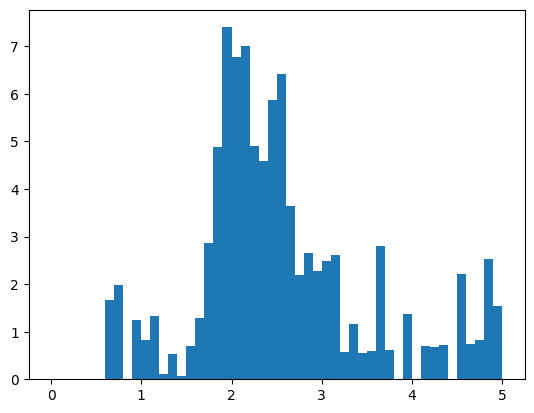

In [282]:
# oscProb_2 = get_osc_prob(new_table, np.linspace(1E-3, 100, 1_000), calcy)

new_exp_vals, new_exp_edges = np.histogram(
    new_table['rec.energy.numu.lstmnu'], # [is_sig > 0],
    weights=oscProb_2, # [is_sig > 0], 
    bins=np.linspace(0, 5, 50 + 1)
)
plt.hist(
    new_exp_edges[:-1],
    bins=new_exp_edges,
    weights=new_exp_vals
);

In [222]:
asimov_array_2 = get_array(
    new_table,
    bins=np.linspace(1E-3, 100, 1_000),
    dm32_values=dm32_values,
    sinsq23_values=sinsq23_values,
    dcp_values=dcp_values
)

In [283]:
ll_surf_2 = [
    [
        [
            FitTools.getPoissonLL(asimov, new_exp_vals) for asimov in asimov_row
        ] for asimov_row in asimov_mat
    ] for asimov_mat in asimov_array_2
]

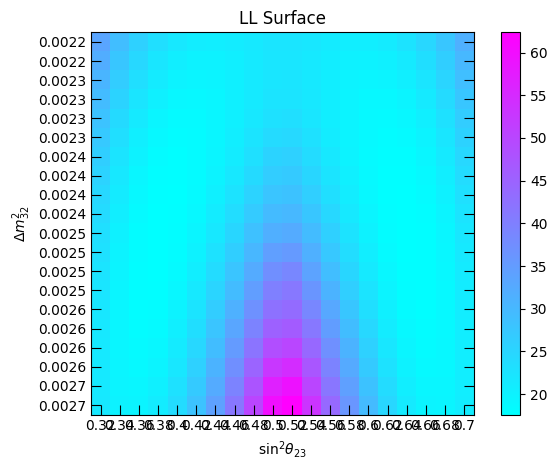

In [284]:
fig, ax = custom_subplots()

image = ax.imshow(FitTools.profile3Dto2D(ll_surf, [2, 1]), cmap='cool')
colourbar = fig.colorbar(image)

ax.set_xticks(range(sinsq23_values.shape[0]))
ax.set_yticks(range(dm32_values.shape[0]))

ax.set_xticklabels(np.round(sinsq23_values, 2))
ax.set_yticklabels(np.round(dm32_values, 4))

ax.set_title('LL Surface')
ax.set_xlabel(r'$\text{sin}^2 \theta_{23}$')
ax.set_ylabel(r'$\Delta m_{32}^2$')

plt.tight_layout();

In [285]:
dcpLLArray_exp = FitTools.profile3Dto1D(ll_surf, 0)
sinLLArray_exp = FitTools.profile3Dto1D(ll_surf, 1)
dmLLArray_exp = FitTools.profile3Dto1D(ll_surf, 2)

dcpLLArray_new_exp = FitTools.profile3Dto1D(ll_surf_2, 0)
sinLLArray_new_exp = FitTools.profile3Dto1D(ll_surf_2, 1)
dmLLArray_new_exp = FitTools.profile3Dto1D(ll_surf_2, 2)

(0, 1, 2)
(1, 2, 0)
(2, 0, 1)
(0, 1, 2)
(1, 2, 0)
(2, 0, 1)


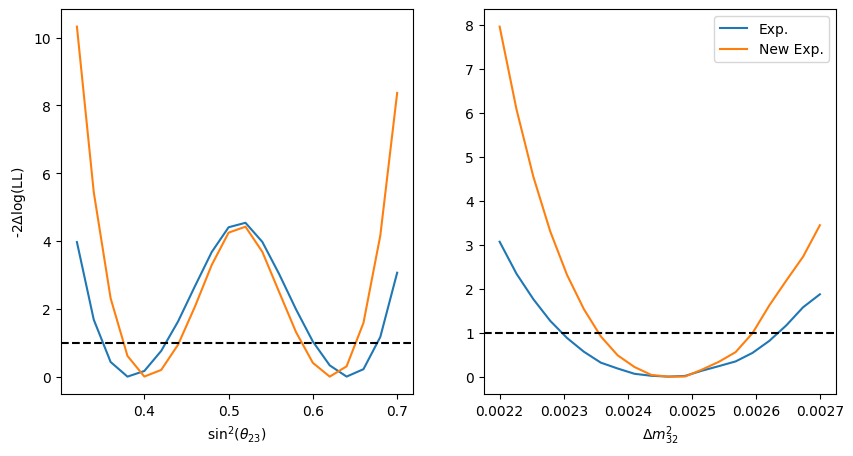

In [286]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(sinsq23_values, sinLLArray_exp - min(sinLLArray_exp), label='Exp.')
axs[0].plot(sinsq23_values, sinLLArray_new_exp - min(sinLLArray_new_exp), label='New Exp.')

axs[0].axhline(1, color='k', ls='--')

axs[0].set_xlabel(r'$\text{sin}^2(\theta_{23})$')
axs[0].set_ylabel(r'-2$\Delta$log(LL)')

axs[1].plot(dm32_values, dmLLArray_exp - min(dmLLArray_exp), label='Exp.')
axs[1].plot(dm32_values, dmLLArray_new_exp - min(dmLLArray_new_exp), label='New Exp.')

axs[1].axhline(1, color='k', ls='--')

axs[1].set_xlabel(r'$\Delta m_{32}^2$')
axs[1].legend();
